*** In this notebook, read the data, histo_TI_Bitcoin_russia_Ukraine_tweet.csv from the local machine, as this data was collected, proproccessed and form in different notebooks.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
sns.set_style("white")
import scipy 
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from IPython.core.pylabtools import figsize
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.layers import *
from keras.models import *
from keras import backend as K

# Set random seed for reproducibility
tf.random.set_seed(42)

In [2]:
df1 = pd.read_csv('histo_TI_bitcoin_russia_Ukraine_tweet.csv')

In [3]:
df1.shape

(525, 22)

In [4]:
df1.head()

,Unnamed: 0,time,low,high,open,volume,TOMORROW_CLOSE,ma7,ma21,26ema,...,20sd,upper_band,lower_band,ema,momentum,log_momentum,Subjectivity Bitcoin,Polarity Bitcoin,Subjectivity russia-ukraine,Polarity russia-ukraine
0,0,2021-01-22,28732.00,33867.00,30855.90,48155.721617,32112.01,34259.641429,35865.701429,35377.080031,...,2768.237573,41402.176574,30329.226283,32345.742206,32111.01,10.376954,0.373306,0.075986,0.343137,0.115877
1,1,2021-01-23,31432.19,33488.79,32982.66,16139.814783,32288.56,33755.150000,35827.982381,35096.733728,...,2813.115648,41454.213677,30201.751085,32307.620735,32287.56,10.382437,0.340508,0.044960,0.342846,0.072527
2,2,2021-01-24,30931.21,33086.53,32110.00,13618.800978,32261.87,33131.955714,35839.500476,34843.637701,...,2797.194653,41433.889782,30245.111171,32277.120245,32260.87,10.381610,0.342169,0.069815,0.393656,0.071735
3,3,2021-01-25,31920.80,34888.00,32293.18,23045.662934,32510.82,32645.318571,35767.128095,34638.483747,...,2865.171051,41497.470197,30036.785993,32432.920082,32509.82,10.389297,0.372609,0.037911,0.333491,0.069510
4,4,2021-01-26,30830.00,32960.37,32260.52,23535.838917,30407.13,31917.324286,35459.883810,34271.457772,...,3080.085635,41620.055080,29299.712539,31082.393361,30406.13,10.322400,0.321886,0.112675,0.335455,0.094306


In [5]:
df1 = df1.drop(['Unnamed: 0'], axis=1)

In [6]:
df1.dtypes

time                            object
low                            float64
high                           float64
open                           float64
volume                         float64
TOMORROW_CLOSE                 float64
ma7                            float64
ma21                           float64
26ema                          float64
12ema                          float64
MACD                           float64
20sd                           float64
upper_band                     float64
lower_band                     float64
ema                            float64
momentum                       float64
log_momentum                   float64
Subjectivity Bitcoin           float64
Polarity Bitcoin               float64
Subjectivity russia-ukraine    float64
Polarity russia-ukraine        float64
dtype: object

In [7]:
df = df1.copy()

In [8]:
df.head()

,time,low,high,open,volume,TOMORROW_CLOSE,ma7,ma21,26ema,12ema,...,20sd,upper_band,lower_band,ema,momentum,log_momentum,Subjectivity Bitcoin,Polarity Bitcoin,Subjectivity russia-ukraine,Polarity russia-ukraine
0,2021-01-22,28732.00,33867.00,30855.90,48155.721617,32112.01,34259.641429,35865.701429,35377.080031,34647.900062,...,2768.237573,41402.176574,30329.226283,32345.742206,32111.01,10.376954,0.373306,0.075986,0.343137,0.115877
1,2021-01-23,31432.19,33488.79,32982.66,16139.814783,32288.56,33755.150000,35827.982381,35096.733728,34275.485985,...,2813.115648,41454.213677,30201.751085,32307.620735,32287.56,10.382437,0.340508,0.044960,0.342846,0.072527
2,2021-01-24,30931.21,33086.53,32110.00,13618.800978,32261.87,33131.955714,35839.500476,34843.637701,33958.909800,...,2797.194653,41433.889782,30245.111171,32277.120245,32260.87,10.381610,0.342169,0.069815,0.393656,0.071735
3,2021-01-25,31920.80,34888.00,32293.18,23045.662934,32510.82,32645.318571,35767.128095,34638.483747,33732.009389,...,2865.171051,41497.470197,30036.785993,32432.920082,32509.82,10.389297,0.372609,0.037911,0.333491,0.069510
4,2021-01-26,30830.00,32960.37,32260.52,23535.838917,30407.13,31917.324286,35459.883810,34271.457772,33212.512918,...,3080.085635,41620.055080,29299.712539,31082.393361,30406.13,10.322400,0.321886,0.112675,0.335455,0.094306


In [9]:
# We see Date is an object, so we have to convert it to datetime
df['time'] = df['time'].astype('datetime64[ns]')

In [10]:
df.dtypes

time                           datetime64[ns]
low                                   float64
high                                  float64
open                                  float64
volume                                float64
TOMORROW_CLOSE                        float64
ma7                                   float64
ma21                                  float64
26ema                                 float64
12ema                                 float64
MACD                                  float64
20sd                                  float64
upper_band                            float64
lower_band                            float64
ema                                   float64
momentum                              float64
log_momentum                          float64
Subjectivity Bitcoin                  float64
Polarity Bitcoin                      float64
Subjectivity russia-ukraine           float64
Polarity russia-ukraine               float64
dtype: object

In [11]:
df.head()

,time,low,high,open,volume,TOMORROW_CLOSE,ma7,ma21,26ema,12ema,...,20sd,upper_band,lower_band,ema,momentum,log_momentum,Subjectivity Bitcoin,Polarity Bitcoin,Subjectivity russia-ukraine,Polarity russia-ukraine
0,2021-01-22,28732.00,33867.00,30855.90,48155.721617,32112.01,34259.641429,35865.701429,35377.080031,34647.900062,...,2768.237573,41402.176574,30329.226283,32345.742206,32111.01,10.376954,0.373306,0.075986,0.343137,0.115877
1,2021-01-23,31432.19,33488.79,32982.66,16139.814783,32288.56,33755.150000,35827.982381,35096.733728,34275.485985,...,2813.115648,41454.213677,30201.751085,32307.620735,32287.56,10.382437,0.340508,0.044960,0.342846,0.072527
2,2021-01-24,30931.21,33086.53,32110.00,13618.800978,32261.87,33131.955714,35839.500476,34843.637701,33958.909800,...,2797.194653,41433.889782,30245.111171,32277.120245,32260.87,10.381610,0.342169,0.069815,0.393656,0.071735
3,2021-01-25,31920.80,34888.00,32293.18,23045.662934,32510.82,32645.318571,35767.128095,34638.483747,33732.009389,...,2865.171051,41497.470197,30036.785993,32432.920082,32509.82,10.389297,0.372609,0.037911,0.333491,0.069510
4,2021-01-26,30830.00,32960.37,32260.52,23535.838917,30407.13,31917.324286,35459.883810,34271.457772,33212.512918,...,3080.085635,41620.055080,29299.712539,31082.393361,30406.13,10.322400,0.321886,0.112675,0.335455,0.094306


In [12]:
df = df.set_index('time')

In [13]:
df.head()

,low,high,open,volume,TOMORROW_CLOSE,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,Subjectivity Bitcoin,Polarity Bitcoin,Subjectivity russia-ukraine,Polarity russia-ukraine
time,,,,,,,,,,,,,,,,,,,,
2021-01-22,28732.00,33867.00,30855.90,48155.721617,32112.01,34259.641429,35865.701429,35377.080031,34647.900062,-729.179969,2768.237573,41402.176574,30329.226283,32345.742206,32111.01,10.376954,0.373306,0.075986,0.343137,0.115877
2021-01-23,31432.19,33488.79,32982.66,16139.814783,32288.56,33755.150000,35827.982381,35096.733728,34275.485985,-821.247744,2813.115648,41454.213677,30201.751085,32307.620735,32287.56,10.382437,0.340508,0.044960,0.342846,0.072527
2021-01-24,30931.21,33086.53,32110.00,13618.800978,32261.87,33131.955714,35839.500476,34843.637701,33958.909800,-884.727901,2797.194653,41433.889782,30245.111171,32277.120245,32260.87,10.381610,0.342169,0.069815,0.393656,0.071735
2021-01-25,31920.80,34888.00,32293.18,23045.662934,32510.82,32645.318571,35767.128095,34638.483747,33732.009389,-906.474358,2865.171051,41497.470197,30036.785993,32432.920082,32509.82,10.389297,0.372609,0.037911,0.333491,0.069510
2021-01-26,30830.00,32960.37,32260.52,23535.838917,30407.13,31917.324286,35459.883810,34271.457772,33212.512918,-1058.944854,3080.085635,41620.055080,29299.712539,31082.393361,30406.13,10.322400,0.321886,0.112675,0.335455,0.094306


In [14]:
# The data is clean already, but let us try to check for any null or NA vales.
print('Null Values:',df.isnull().values.sum())
print('If any NA values:', df.isnull().values.any())

Null Values: 0
If any NA values: False


In [15]:
# check the shape of data to know how many sample we have
df.shape

(525, 20)

In [16]:
# Split the data intro train data (90%) and test data (10%)
train_size = int(len(df)*0.90)
train_dataset, test_dataset = df.iloc[:train_size],df.iloc[train_size:]

In [17]:
# Double check the split
train_dataset.head()

,low,high,open,volume,TOMORROW_CLOSE,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,Subjectivity Bitcoin,Polarity Bitcoin,Subjectivity russia-ukraine,Polarity russia-ukraine
time,,,,,,,,,,,,,,,,,,,,
2021-01-22,28732.00,33867.00,30855.90,48155.721617,32112.01,34259.641429,35865.701429,35377.080031,34647.900062,-729.179969,2768.237573,41402.176574,30329.226283,32345.742206,32111.01,10.376954,0.373306,0.075986,0.343137,0.115877
2021-01-23,31432.19,33488.79,32982.66,16139.814783,32288.56,33755.150000,35827.982381,35096.733728,34275.485985,-821.247744,2813.115648,41454.213677,30201.751085,32307.620735,32287.56,10.382437,0.340508,0.044960,0.342846,0.072527
2021-01-24,30931.21,33086.53,32110.00,13618.800978,32261.87,33131.955714,35839.500476,34843.637701,33958.909800,-884.727901,2797.194653,41433.889782,30245.111171,32277.120245,32260.87,10.381610,0.342169,0.069815,0.393656,0.071735
2021-01-25,31920.80,34888.00,32293.18,23045.662934,32510.82,32645.318571,35767.128095,34638.483747,33732.009389,-906.474358,2865.171051,41497.470197,30036.785993,32432.920082,32509.82,10.389297,0.372609,0.037911,0.333491,0.069510
2021-01-26,30830.00,32960.37,32260.52,23535.838917,30407.13,31917.324286,35459.883810,34271.457772,33212.512918,-1058.944854,3080.085635,41620.055080,29299.712539,31082.393361,30406.13,10.322400,0.321886,0.112675,0.335455,0.094306


In [18]:
# Split train data to X and y
X_train = train_dataset.drop('TOMORROW_CLOSE', axis = 1)
y_train = train_dataset.loc[:,['TOMORROW_CLOSE']]

# Split test data to X and y
X_test = test_dataset.drop('TOMORROW_CLOSE', axis = 1)
y_test = test_dataset.loc[:,['TOMORROW_CLOSE']]

In [19]:
# Double check the X
X_train.head()

,low,high,open,volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,Subjectivity Bitcoin,Polarity Bitcoin,Subjectivity russia-ukraine,Polarity russia-ukraine
time,,,,,,,,,,,,,,,,,,,
2021-01-22,28732.00,33867.00,30855.90,48155.721617,34259.641429,35865.701429,35377.080031,34647.900062,-729.179969,2768.237573,41402.176574,30329.226283,32345.742206,32111.01,10.376954,0.373306,0.075986,0.343137,0.115877
2021-01-23,31432.19,33488.79,32982.66,16139.814783,33755.150000,35827.982381,35096.733728,34275.485985,-821.247744,2813.115648,41454.213677,30201.751085,32307.620735,32287.56,10.382437,0.340508,0.044960,0.342846,0.072527
2021-01-24,30931.21,33086.53,32110.00,13618.800978,33131.955714,35839.500476,34843.637701,33958.909800,-884.727901,2797.194653,41433.889782,30245.111171,32277.120245,32260.87,10.381610,0.342169,0.069815,0.393656,0.071735
2021-01-25,31920.80,34888.00,32293.18,23045.662934,32645.318571,35767.128095,34638.483747,33732.009389,-906.474358,2865.171051,41497.470197,30036.785993,32432.920082,32509.82,10.389297,0.372609,0.037911,0.333491,0.069510
2021-01-26,30830.00,32960.37,32260.52,23535.838917,31917.324286,35459.883810,34271.457772,33212.512918,-1058.944854,3080.085635,41620.055080,29299.712539,31082.393361,30406.13,10.322400,0.321886,0.112675,0.335455,0.094306


**Data Normalization**

In [20]:
# Different scaler for input and output ----> Normalizate the data
scaler_x = MinMaxScaler(feature_range = (-1,1))
scaler_y = MinMaxScaler(feature_range = (-1,1))

# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

**Prepare the data to be fed into the model.
Create 3 D tensor of data.**

In [21]:
# Create 3 dimensional data set 
def threeD_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
        
    return np.array(Xs), np.array(ys)


TIME_STEPS = 15 # which means the model will make predictions of ‘TOMORROW_CLOSE’ based on the input from the 10 previous days or future days bi-lstm or bi-gru

X_test, y_test = threeD_dataset(test_x_norm, test_y_norm, TIME_STEPS)
X_train, y_train = threeD_dataset(train_x_norm, train_y_norm, TIME_STEPS)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (457, 15, 19)
y_train.shape:  (457, 1)
X_test.shape:  (38, 15, 19)
y_test.shape:  (38, 1)


**FINALLY, we can CONSTUCT the MODEL**

In [22]:
# Create LSTM 
def create_model(m):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = 128, activation = 'relu', return_sequences = False, input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))   
    model.compile(loss = 'mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3 ) ) 
    return model

In [23]:
# Create the model by passing LSTM to the model.
model_lstm = create_model(LSTM)

In [24]:
# Let's check the summary of our baby model
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               75776     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 75,905
Trainable params: 75,905
Non-trainable params: 0
_________________________________________________________________


In [25]:
# start the  training process, with 50 epochs, (the number of times the model will look at the entire dataset), validation split is 20 % from the training data, this is
# done autmatically by Keras, batch size of 16, meaning that, the model will take try to minimize the loss by looking at only 16 samples, shuffle is false, because this is time 
# data, so the order matters alot.
history_lstm = model_lstm.fit(X_train, y_train, epochs = 50, validation_split = 0.2,batch_size = 16, shuffle = False) 

Epoch 1/50
23/23 [==============================] - 5s 68ms/step - loss: 0.1171 - val_loss: 0.0727
Epoch 2/50
23/23 [==============================] - 1s 36ms/step - loss: 0.0760 - val_loss: 0.0431
Epoch 3/50
23/23 [==============================] - 1s 32ms/step - loss: 0.0320 - val_loss: 0.0201
Epoch 4/50
23/23 [==============================] - 1s 31ms/step - loss: 0.0338 - val_loss: 0.0284
Epoch 5/50
23/23 [==============================] - 1s 36ms/step - loss: 0.0301 - val_loss: 0.0195
Epoch 6/50
23/23 [==============================] - 1s 31ms/step - loss: 0.0266 - val_loss: 0.0202
Epoch 7/50
23/23 [==============================] - 1s 31ms/step - loss: 0.0246 - val_loss: 0.0140
Epoch 8/50
23/23 [==============================] - 1s 34ms/step - loss: 0.0228 - val_loss: 0.0164
Epoch 9/50
23/23 [==============================] - 1s 34ms/step - loss: 0.0207 - val_loss: 0.0131
Epoch 10/50
23/23 [==============================] - 1s 33ms/step - loss: 0.0190 - val_loss: 0.0140
Epoch 11/

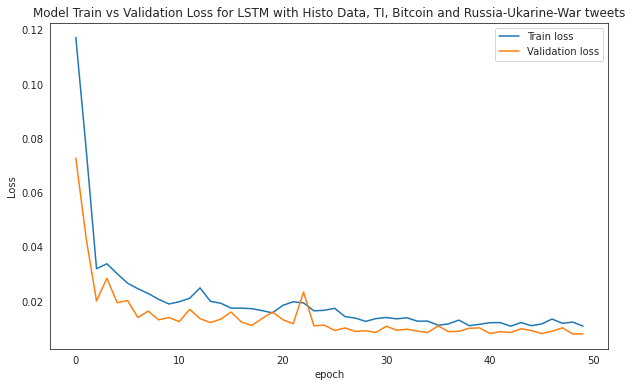

In [26]:
#Plot train and validation loss
def plot_loss (history, model_name):
    fig3 = plt.figure(figsize = (10, 6))
    plt.rcParams['figure.dpi'] = 360
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name + ' with Histo Data, TI, Bitcoin and Russia-Ukarine-War tweets')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    fig3.savefig('Model_Train_vs_Validation_Loss_for_LSTM_with_TI_Bitcoin_Russia_Ukraine_tweets.png')
plot_loss (history_lstm, 'LSTM')


Before we start the testing phase, we need to inverse the normalization process that we applied to the data.

In [27]:
# inverse the y
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

Define a function to inverse the X

In [28]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

In [29]:
# Do predictions
prediction_LSTM = prediction(model_lstm)

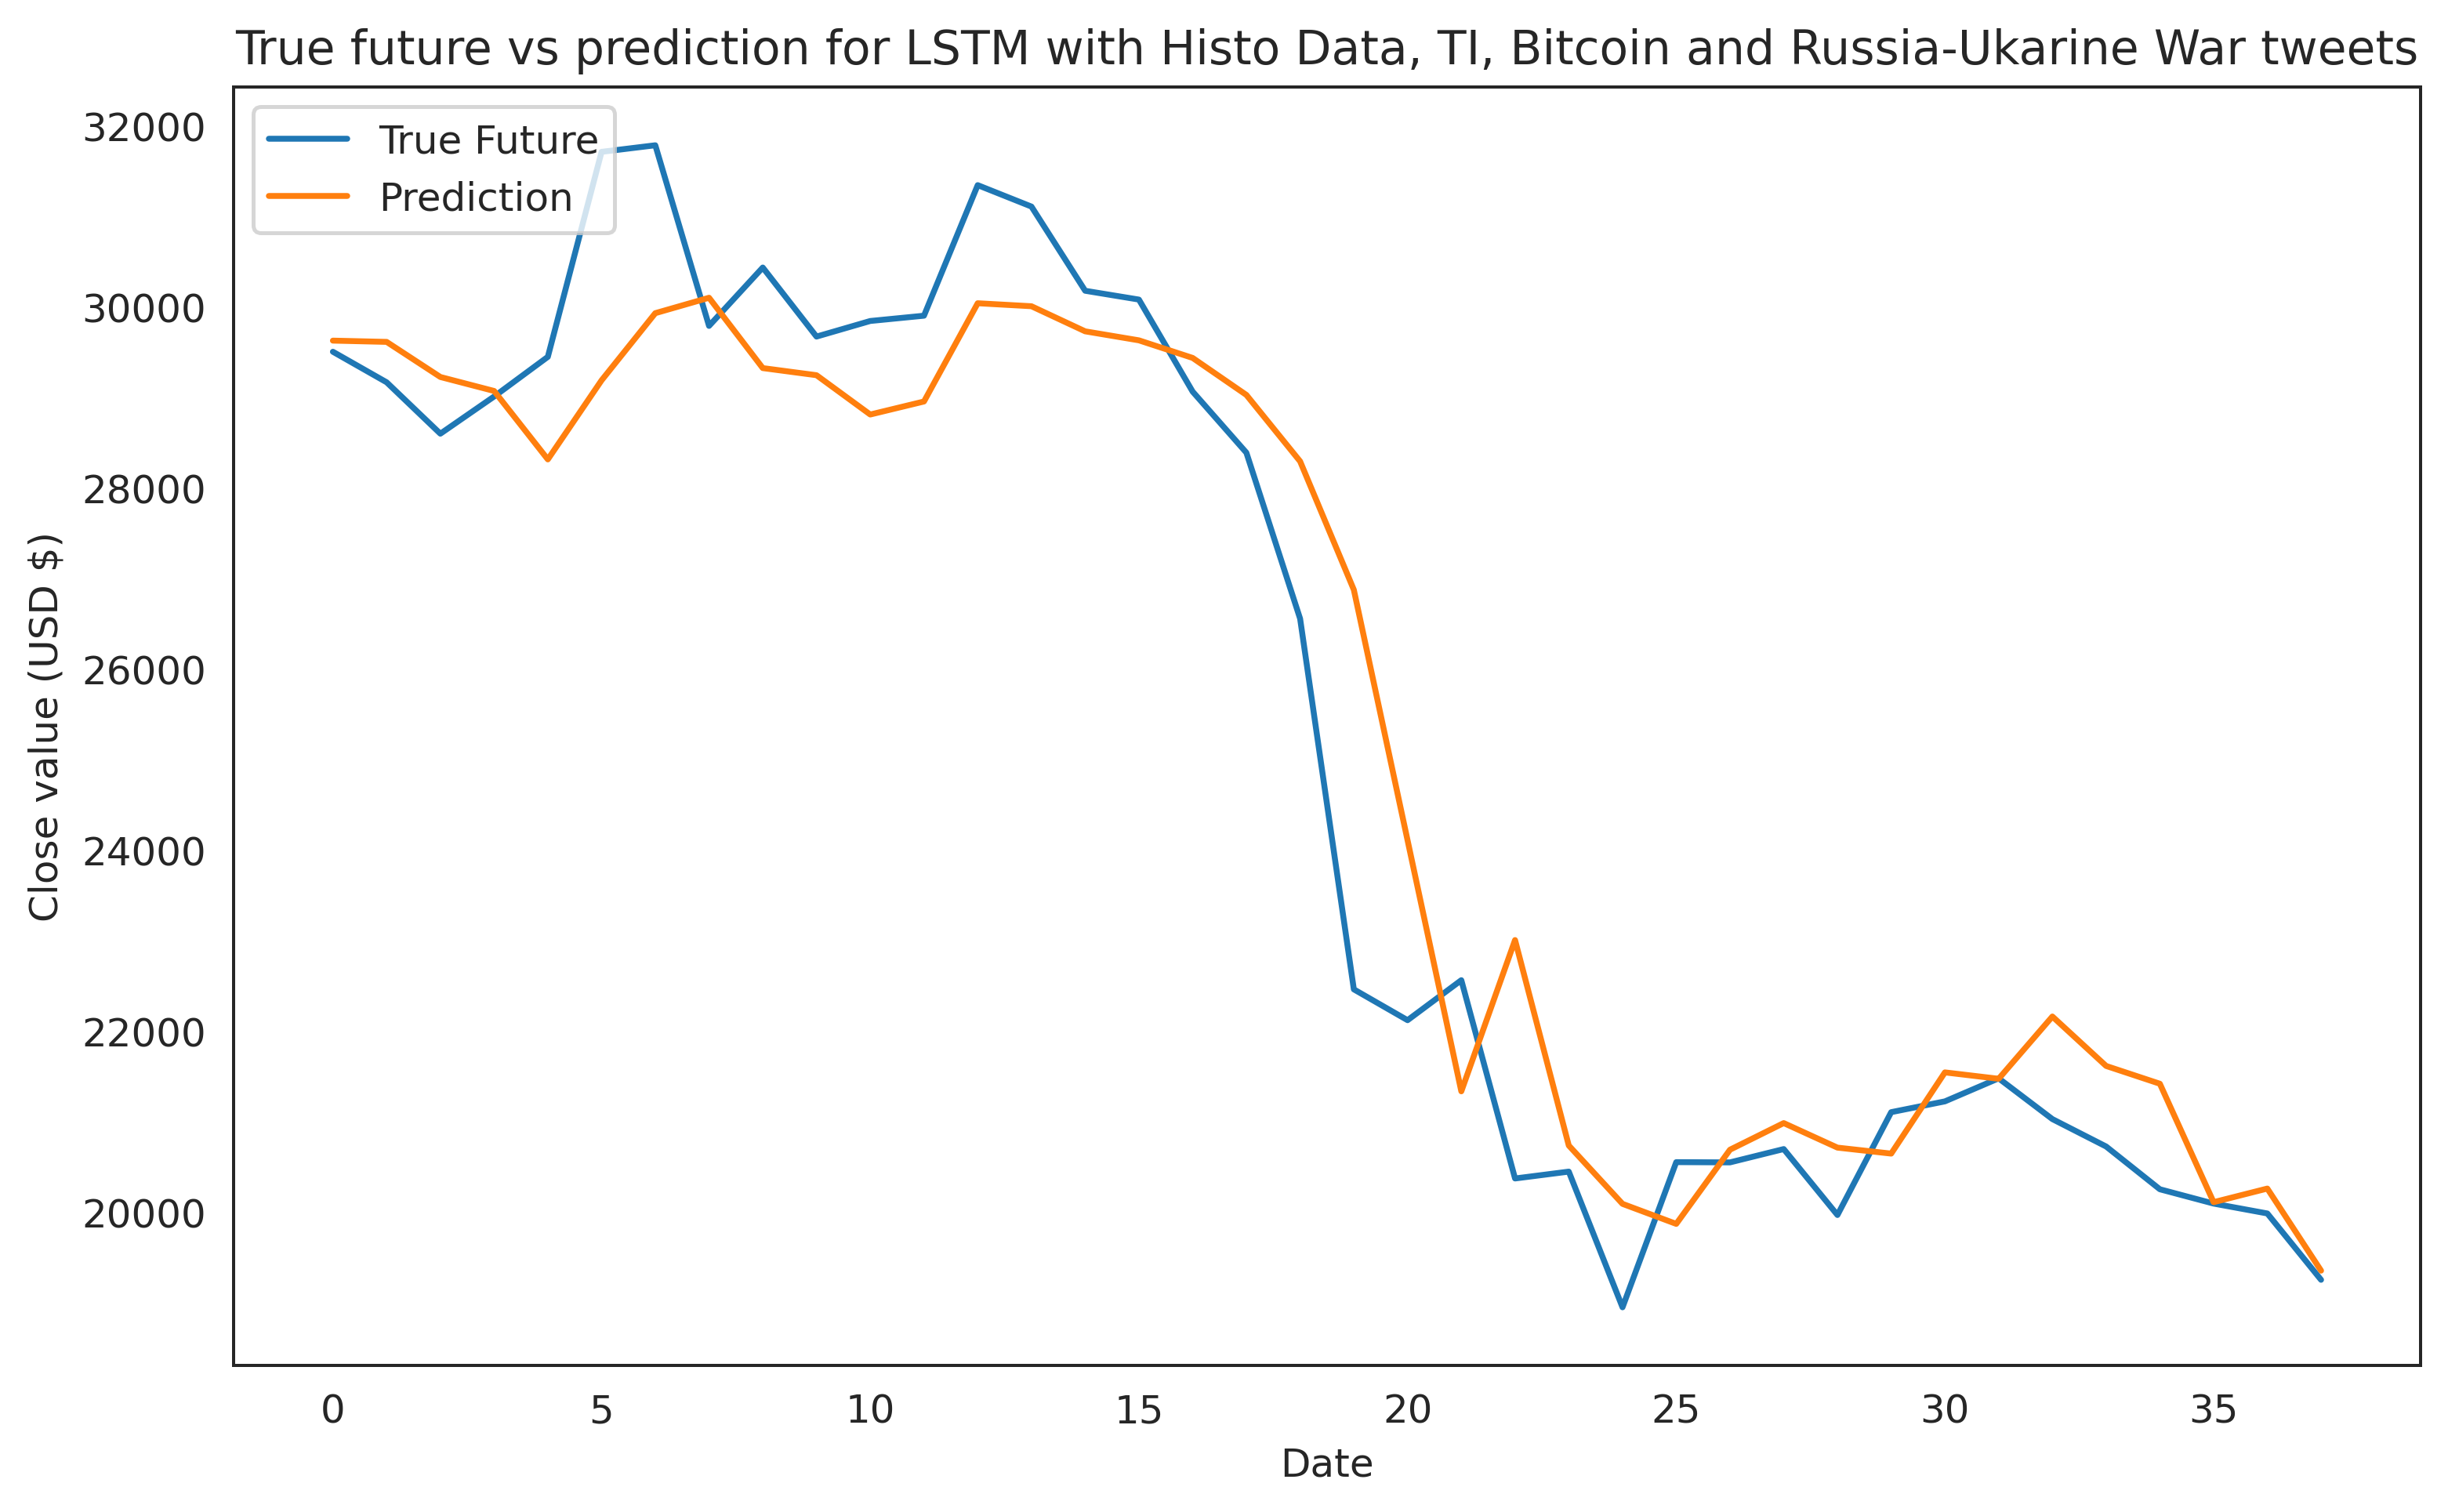

In [30]:
def plot_future(prediction, model_name, y_test):
    fig4 = plt.figure(figsize=(10, 6))
    plt.rcParams['figure.dpi'] = 360
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='True Future')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')
    plt.title('True future vs prediction for ' + model_name + ' with Histo Data, TI, Bitcoin and Russia-Ukarine War tweets')
    plt.legend(loc='upper left')
    plt.xlabel('Date')
    plt.ylabel('Close value (USD $)')
    fig4.savefig('True_future_vs_prediction_for_LSTM_with_TI_Bitcoin_Russia_Ukraine_War_tweets.png')
plot_future(prediction_LSTM, 'LSTM', y_test)

In [31]:
## Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

In [32]:
evaluate_prediction(prediction_LSTM, y_test, 'LSTM-with_TI_Bitcoin_Russia_Ukraine_tweets')

LSTM-with_TI_Bitcoin_Russia_Ukraine_tweets:
Mean Absolute Error: 909.3387
Root Mean Square Error: 1259.3322

